In [64]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from patsy import dmatrices
from patsy import dmatrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder

In [24]:
## Importing the csv
df = pd.read_csv('mcdonalds.csv')
df1 = pd.read_csv('mcdonalds.csv')

In [25]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [26]:
## Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [27]:
## sample size
df.shape

## Dataframe contains 1453 rows and 15 colums

(1453, 15)

In [28]:
df.isnull().sum()

## there are no null values in data

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [29]:
## variable names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [30]:
# Saving segmentation variable into separate matrix
df_var = df.iloc[:, 0:11]

In [31]:
df_var

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [32]:
# Adding 0 to the logical matrix converts TRUE to 1, and FALSE to 0
df_var.replace({'Yes': 1, 'No': 0}, inplace=True)

In [33]:
df_var.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [34]:
df_var.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
## Checking the mean
column_averages = round(df_var.mean(), 2)

In [36]:
column_averages

##  About half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
##  McDonald’s food is SPICY and so on

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [37]:
## Data exploration using principle components
pca = PCA()
MD_pca = pca.fit(df_var)

# Summary
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
components = pca.components_

summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

print("PCA Summary:")
print(summary_df)

print("\nPrincipal Components:")
print(components)


PCA Summary:
    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000

Principal Components:
[[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 

In [38]:
principal_df = pd.DataFrame(data=components.T, columns=[f'PC{i+1}' for i in range(components.T.shape[1])], index = df_var.columns)


In [39]:
round(principal_df, 3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,0.055,0.308,-0.171,-0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,-0.142,-0.278,0.348,-0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,0.198,-0.071,0.355,0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,-0.354,0.073,0.407,-0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,0.254,-0.361,-0.209,0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,-0.097,-0.108,0.595,-0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,0.119,0.129,0.103,-0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,-0.003,0.211,0.077,0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,0.068,0.003,0.261,-0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,0.763,-0.288,0.178,-0.350,-0.176,0.186,0.038,-0.158


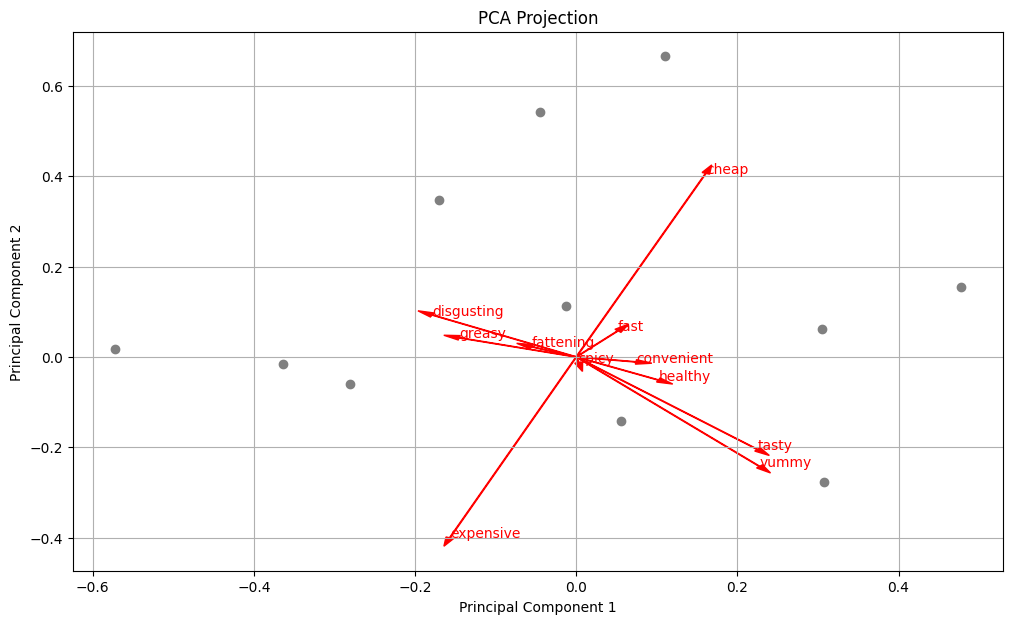

In [40]:
## Principal components analysis of the fast food data set
plt.figure(figsize=(12, 7))
plt.scatter(components[:, 0], components[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')

for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1 * max(components[:, 0]), pc2 * max(components[:, 1]),
              color='r', head_width=0.01, head_length=0.02)
    plt.text(pc1 * max(components[:, 0]), pc2 * max(components[:, 1]),
             df_var.columns[i], color='r')

plt.grid()
plt.show()


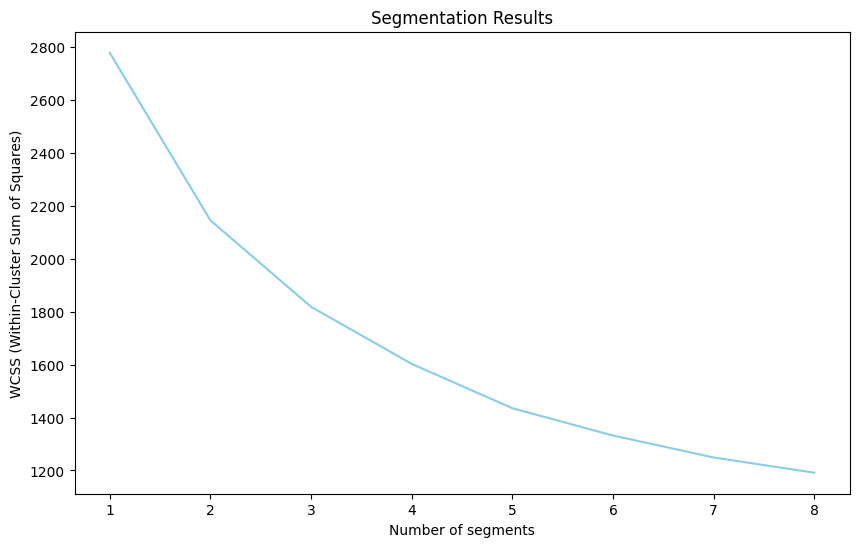

In [41]:
np.random.seed(1234)
nrep = 10
num_segments = range(1, 9)

wcss = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df_var)
    
    wcss.append(kmeans.inertia_)
    
    MD_km28[str(k)] = kmeans

plt.figure(figsize=(10, 6))  
plt.plot(num_segments, wcss, color='skyblue')
plt.xlabel("Number of segments")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Segmentation Results")
plt.xticks(num_segments)  
plt.show()


In [42]:
MD_km28

{'1': KMeans(n_clusters=1, n_init=10, random_state=1234),
 '2': KMeans(n_clusters=2, n_init=10, random_state=1234),
 '3': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '4': KMeans(n_clusters=4, n_init=10, random_state=1234),
 '5': KMeans(n_clusters=5, n_init=10, random_state=1234),
 '6': KMeans(n_clusters=6, n_init=10, random_state=1234),
 '7': KMeans(n_clusters=7, n_init=10, random_state=1234),
 '8': KMeans(n_init=10, random_state=1234)}

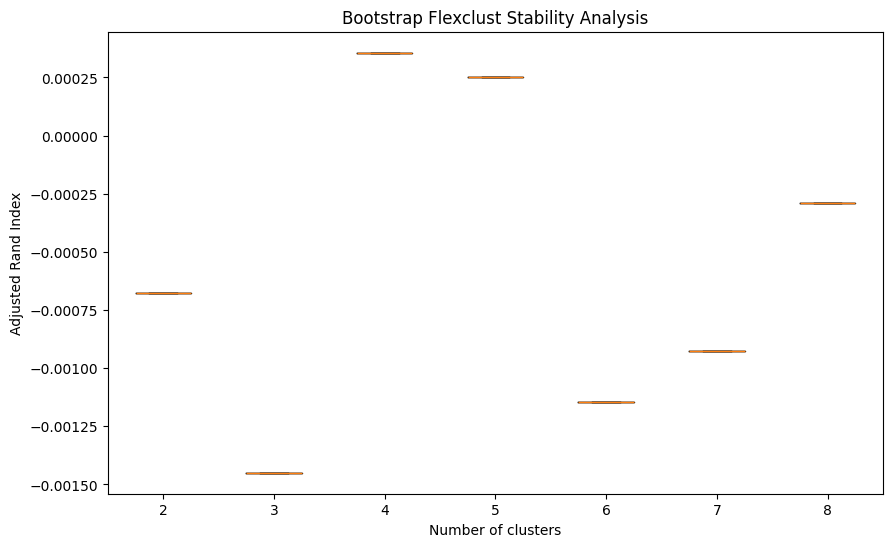

In [43]:
# Global stability of k-means segmentation solutions for the fast food data set
np.random.seed(1234)

n_bootstraps = 100
n_init_repeats = 10
num_clusters_range = range(2, 9)

bootstrap_data = [resample(df_var.values, random_state=1234) for _ in range(n_bootstraps)]

ari_scores = []

for num_clusters in num_clusters_range:
    cluster_stability_scores = []

    for sample in bootstrap_data:
        kmeans = KMeans(n_clusters=num_clusters, n_init=n_init_repeats, random_state=1234)
        kmeans.fit(sample)
        sample_labels = kmeans.labels_
        
        original_labels = kmeans.predict(df_var.values)
        
        ari = adjusted_rand_score(original_labels, sample_labels)
        cluster_stability_scores.append(ari)
    
    ari_scores.append(cluster_stability_scores)

ari_scores_array = np.array(ari_scores).T

plt.figure(figsize=(10, 6))
plt.boxplot(ari_scores_array, labels=num_clusters_range, whis=10)
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust Stability Analysis")
plt.show()


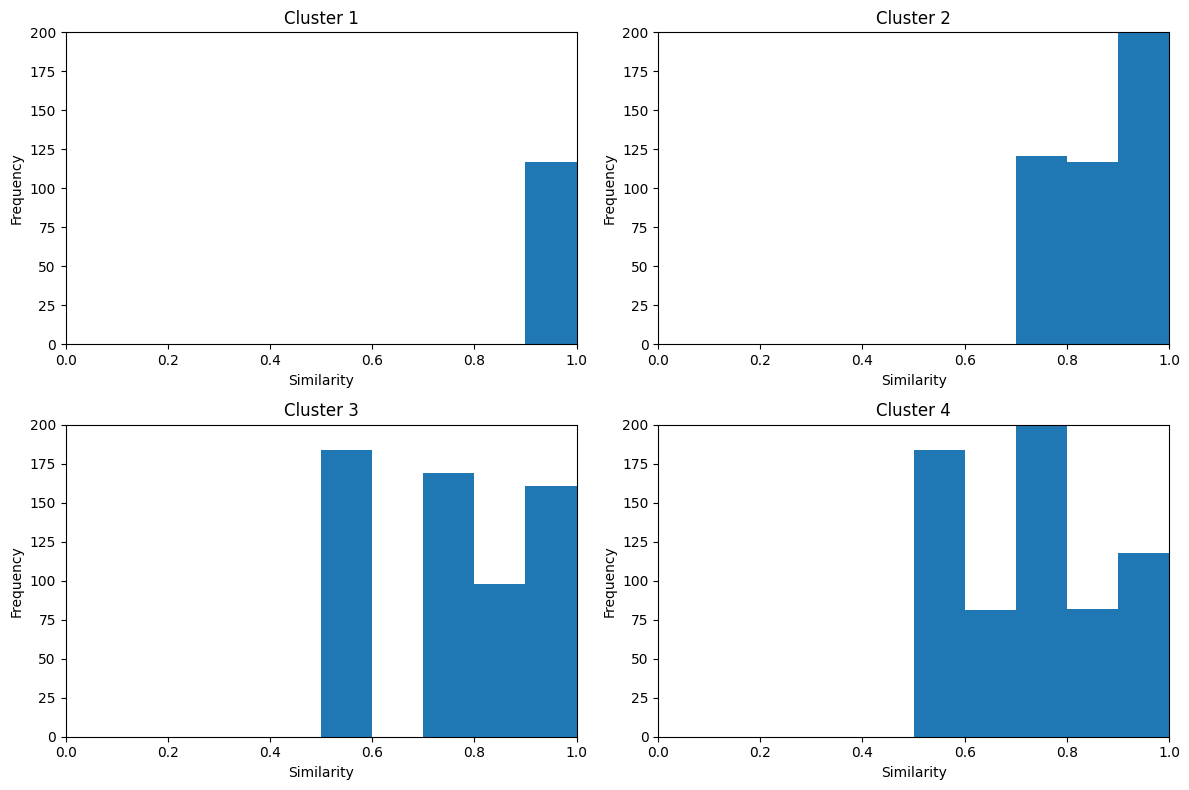

In [44]:
## Gorge plot of the four-segment k-means solution for the fast food data set

range_values = (0, 1)
num_bins = 10
max_frequency = 200

#subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

cluster_indices = range(1, 5)

for idx in cluster_indices:
    kmeans_model = MD_km28[str(idx)]
    cluster_labels = kmeans_model.predict(df_var)
    similarities = kmeans_model.transform(df_var).min(axis=1)
    
    row, col = divmod(idx - 1, 2)
    ax = axs[row, col]
    
    ax.hist(similarities, bins=num_bins, range=range_values)
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Cluster {idx}')
    
    ax.set_xlim(range_values)
    ax.set_ylim(0, max_frequency)
    ax.set_xticks(np.linspace(0, 1, 6))

plt.tight_layout()
plt.show()


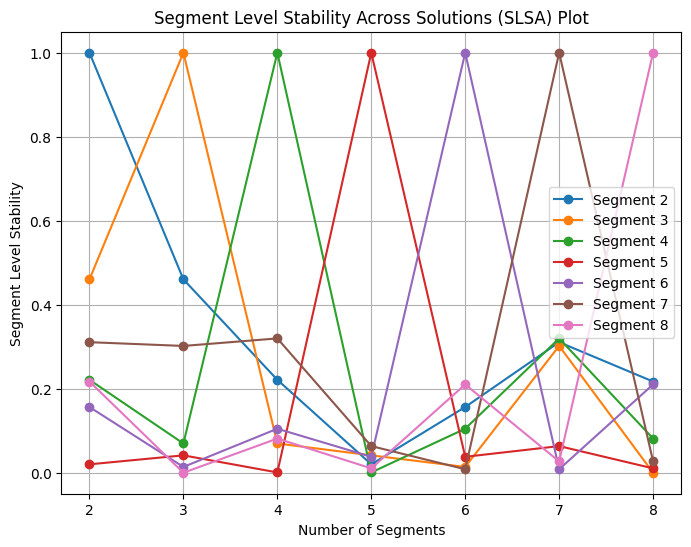

In [45]:
num_segments = range(2, 9)

segment_stability = [
    MD_km28[str(segment)].predict(df_var)
    for segment in num_segments
]

plt.figure(figsize=(8, 6))

for idx, segment in enumerate(num_segments):
    stability_scores = [
        np.mean(segment_stability[idx] == labels)
        for labels in segment_stability
    ]
    plt.plot(num_segments, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


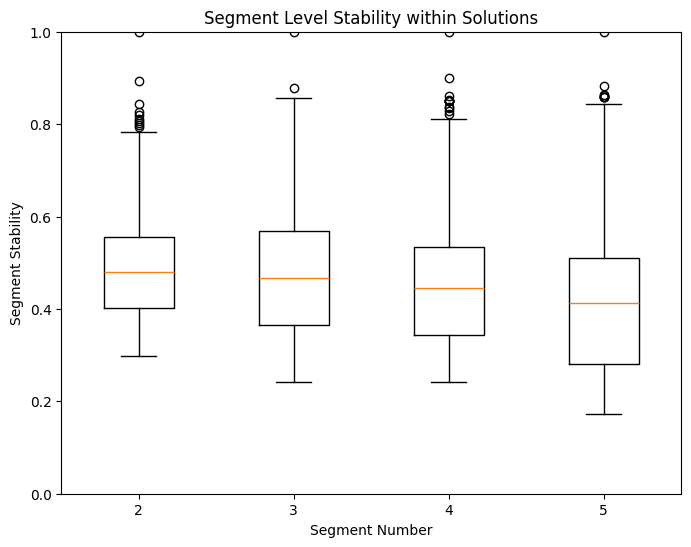

In [46]:
segment_solutions = [2, 3, 4, 5]

labels_dict = {}
similarities_dict = {}

for segment in segment_solutions:
    labels_dict[segment] = MD_km28[str(segment)].predict(df_var)
    similarities = MD_km28[str(segment)].transform(df_var).min(axis=1)
    similarities_dict[segment] = similarities / similarities.max()  # Normalize similarities

stability_values = [similarities_dict[segment] for segment in segment_solutions]

plt.figure(figsize=(8, 6))
plt.boxplot(stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(ticks=range(1, len(segment_solutions) + 1), labels=segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


In [47]:
# We calculate latent class analysis using a finite mixture of binary distributions.
np.random.seed(1234)

k_values = range(2, 9)

model_info = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(df_var.values)
    
    iterations = kmeans.n_iter_
    is_converged = True
    log_likelihood = -kmeans.inertia_
    num_samples = df_var.shape[0]
    
    aic_value = -2 * log_likelihood + 2 * k
    bic_value = -2 * log_likelihood + np.log(num_samples) * k
    
    labels = kmeans.labels_
    label_counts = np.bincount(labels)
    label_probs = label_counts / label_counts.sum()
    cluster_entropy = entropy(label_probs)
    
    icl_value = bic_value - cluster_entropy
    
    model_info.append((iterations, is_converged, k, k, log_likelihood, aic_value, bic_value, icl_value))

model_info_df = pd.DataFrame(model_info, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(model_info_df)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


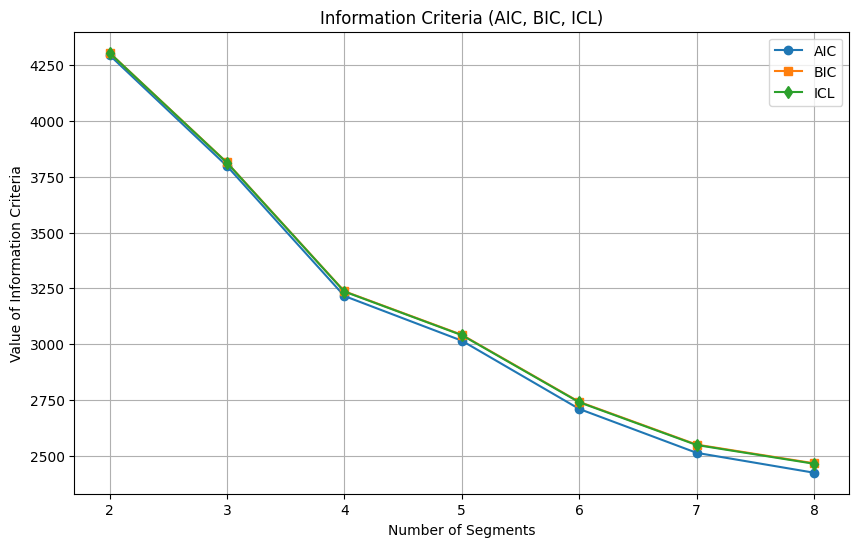

In [53]:
k_segments = model_info_df["k"]
aic_values = model_info_df["AIC"]
bic_values = model_info_df["BIC"]
icl_values = model_info_df["ICL"]

plt.figure(figsize=(10, 6))

plt.plot(k_segments, aic_values, 'o-', label='AIC')

plt.plot(k_segments, bic_values, 's-', label='BIC')

plt.plot(k_segments, icl_values, 'd-', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')

plt.legend()
plt.grid(True)

plt.show()


In [54]:
num_clusters = 4

kmeans_model = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_model.fit(df_var)
kmeans_labels = kmeans_model.labels_

gmm_model = GaussianMixture(n_components=num_clusters, random_state=1234)
gmm_model.fit(df_var)
gmm_labels = gmm_model.predict(df_var)

cluster_results = pd.DataFrame({'KMeans': kmeans_labels, 'GMM': gmm_labels})

MD_m4 = df_var[cluster_results['GMM'] == 3]

kmeans_subset = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_subset.fit(MD_m4)
subset_kmeans_labels = kmeans_subset.labels_

subset_cluster_results = pd.DataFrame({'KMeans': subset_kmeans_labels, 'GMM': 3})

crosstab_kmeans_gmm = pd.crosstab(cluster_results['KMeans'], cluster_results['GMM'])
crosstab_kmeans_subset = pd.crosstab(cluster_results['KMeans'], subset_cluster_results['KMeans'])

print(crosstab_kmeans_gmm)
print(crosstab_kmeans_subset)


GMM       0    1    2    3
KMeans                    
0       546    0    1   33
1         0  213   11    4
2        46    3  265    8
3        29   38    0  256
KMeans   0   1   2   3
KMeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [55]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(df_var)

log_likelihood_m4a = gmm_m4a.score(df_var)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(df_var)

log_likelihood_m4 = gmm_m4.score(df_var)

print(f"Log-likelihood for gmm_model_1: {log_likelihood_m4a}")
print(f"Log-likelihood for gmm_model_2: {log_likelihood_m4}")


Log-likelihood for gmm_model_1: 9.456781748071885
Log-likelihood for gmm_model_2: 3.642746401176581


In [56]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [57]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [58]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3.0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,NaN
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,NaN
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,NaN
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,NaN


In [59]:
ind_vars = df.columns[0:11]

formula_str = 'Like ~ ' + ' + '.join(ind_vars)

design_matrix = dmatrices(formula_str, data=df)[1]

print(design_matrix)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [63]:
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(design_matrix.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep = 10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
model.fit(X, y)

print(model)

cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i + 1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


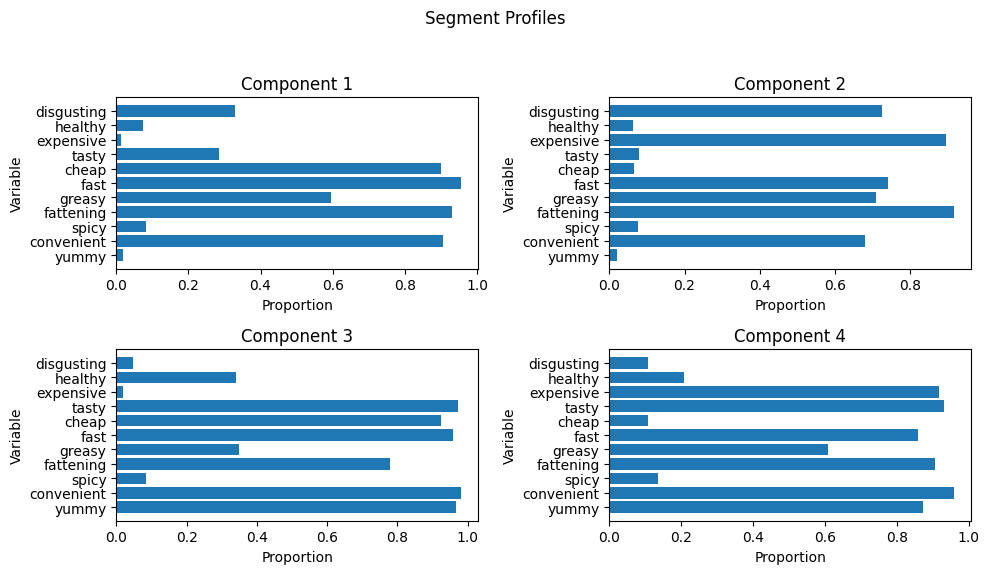

In [65]:
kmeans_model = MD_km28['4']

labels = kmeans_model.labels_

cluster_means = df_var.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    ax.barh(range(cluster_means.shape[1]), cluster_means.iloc[i])
    ax.set_title(f'Component {i+1}')
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(cluster_means.shape[1]))
    ax.set_yticklabels(df_var.columns)

fig.suptitle('Segment Profiles')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


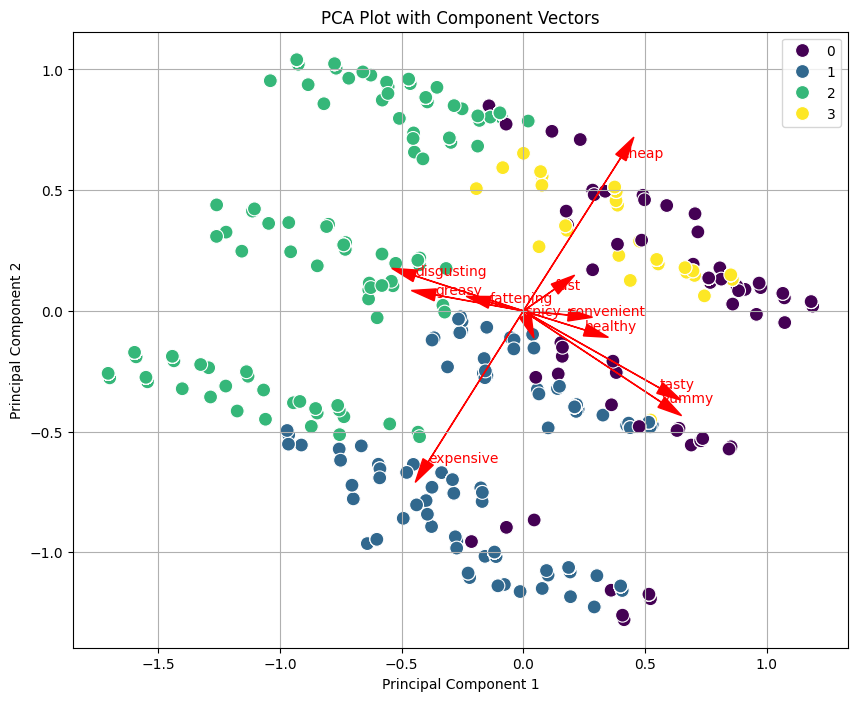

In [68]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(df_var)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(df_var)

plt.figure(figsize=(10, 8))

sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans_model.labels_, palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Component Vectors')
plt.grid(True)

for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1 * max(MD_pca[:, 0]), pc2 * max(MD_pca[:, 1]),
              color='r', head_width=0.05, head_length=0.1)
    plt.text(pc1 * max(MD_pca[:, 0]), pc2 * max(MD_pca[:, 1]),
             df_var.columns[i], color='r')

plt.show()


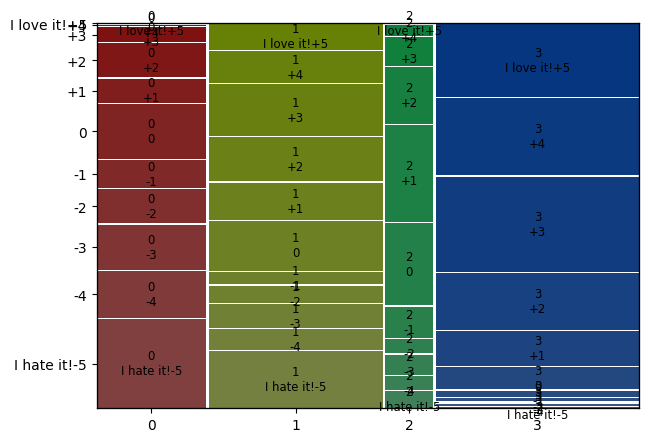

In [69]:
def label_encoding(df, cols):
    for col in cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

cat_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting']

df_encoded = label_encoding(df1.copy(), cat_cols)

kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded[cat_cols])
df_encoded['cluster_num'] = kmeans_model.labels_

crosstab = pd.crosstab(df_encoded['cluster_num'], df1['Like'])

crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]

plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()


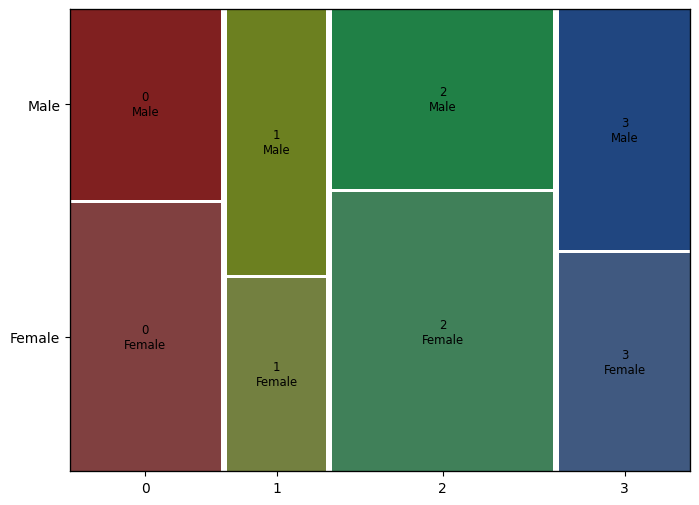

In [258]:
kmeans_model = MD_km28['4']
k4_labels = kmeans_model.labels_

crosstab = pd.crosstab(k4_labels, df['Gender'])

plt.rcParams['figure.figsize'] = (8, 6)
mosaic(crosstab.stack(), gap=0.01)
plt.show()


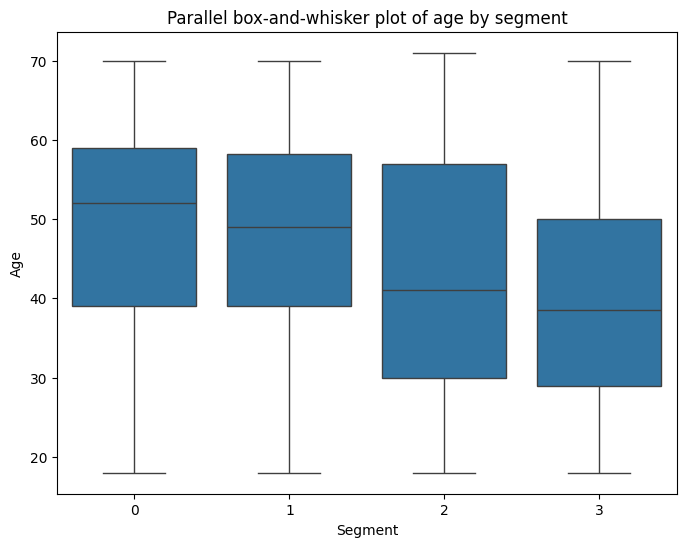

In [260]:
df3 = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=df3)
plt.title('Parallel box-and-whisker plot of age by segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()


In [261]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [262]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [263]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


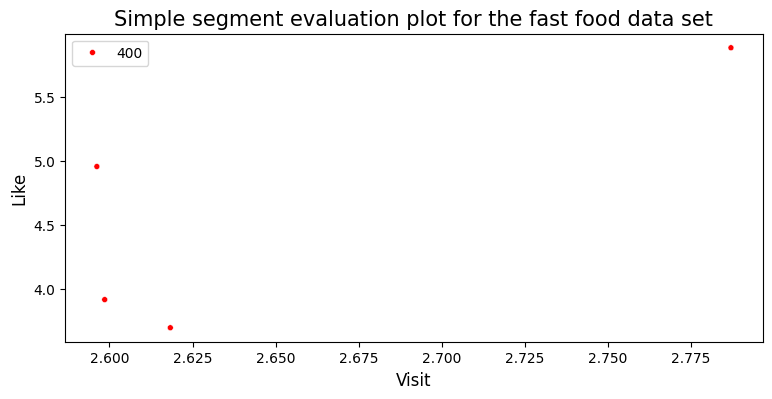

In [204]:
Merge dataframes
segment = pd.merge(pd.merge(Gender, Like, on='cluster_num', how='left'), visit, on='cluster_num', how='left')

plt.figure(figsize=(9, 4))
sns.scatterplot(data=segment, x='VisitFrequency', y='Like', size=400, color='r')
plt.title('Simple segment evaluation plot for the fast food data set', fontsize=15)
plt.xlabel('Visit', fontsize=12)
plt.ylabel('Like', fontsize=12)
plt.show()
